## Import and Merge


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib

In [2]:
# read csv file 
fundamentals =pd.read_csv('../data/fundamentals.csv') 

In [3]:
# group by ticker
fundamentals_group = fundamentals.groupby ('Ticker Symbol')

In [4]:
fundamentals_group.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08


In [42]:
# drop columns we don't need
fundamentals_clean =fundamentals.set_index('Ticker Symbol').loc[ 
           : , 
            ['Period Ending', 'Net Income','Profit Margin' ,'Quick Ratio' ,'Total Assets', 
             'Total Liabilities', 'Earnings Per Share', 'Estimated Shares Outstanding','Total Current Assets', 'Total Current Liabilities' ]
]


In [6]:
def clean_date(date):
    if len(date) > 10: 
        clean_date= date[:10]
    else: 
        clean_date= date
    return clean_date

assert clean_date('2016-12-30 00:00:00') == '2016-12-30'
assert clean_date('2016-11-06 00:00:00') == '2016-11-06'
assert clean_date( '2016-12-30')=='2016-12-30'

In [7]:
fundamentals_clean['Period Ending'] = fundamentals_clean['Period Ending'].apply(clean_date) 

In [8]:
final_fund =fundamentals_clean.loc[(fundamentals_clean['Period Ending'] == '2015-12-31') ]

In [9]:
final_fund

,Period Ending,Net Income,Profit Margin,Quick Ratio,Total Assets,Total Liabilities,Earnings Per Share,Estimated Shares Outstanding,Total Current Assets,Total Current Liabilities
Ticker Symbol,,,,,,,,,,
AAL,2015-12-31,7.610000e+09,19.0,67.0,4.841500e+10,4.278000e+10,11.39,6.681299e+08,9.985000e+09,1.360500e+10
ABBV,2015-12-31,5.144000e+09,23.0,134.0,5.305000e+10,4.910500e+10,3.15,1.633016e+09,1.631400e+10,1.089400e+10
ABT,2015-12-31,4.423000e+09,22.0,126.0,4.124700e+10,2.003600e+10,2.94,1.504422e+09,1.415500e+10,9.186000e+09
ADM,2015-12-31,1.849000e+09,3.0,101.0,4.015700e+10,2.224200e+10,2.99,6.183946e+08,2.182900e+10,1.350500e+10
ADS,2015-12-31,5.965410e+08,9.0,254.0,2.242183e+10,2.041180e+10,8.91,6.695185e+07,1.625042e+10,6.405559e+09
...,...,...,...,...,...,...,...,...,...,...
XYL,2015-12-31,3.400000e+08,9.0,191.0,4.657000e+09,2.573000e+09,1.88,1.808511e+08,2.005000e+09,8.230000e+08
YHOO,2015-12-31,-4.359082e+09,88.0,588.0,4.520397e+10,1.616043e+10,-4.64,9.394573e+08,7.507319e+09,1.277380e+09
ZBH,2015-12-31,1.470000e+08,2.0,223.0,2.721950e+10,1.733160e+10,0.78,1.884615e+08,5.862900e+09,1.617900e+09


In [10]:
# read prices csv
prices= pd.read_csv('../data/prices.csv') 
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [11]:
# drop columns we don't need
prices_index =prices.set_index('symbol').loc[ 
           : , 
            ['date', 'close']
]

In [12]:
prices_index['date'] = prices_index['date'].apply(clean_date) 

In [13]:
final_prices = prices_index.loc[(prices_index['date'] == '2015-12-30') ]

In [14]:
final_prices.index.name = 'Ticker Symbol'

In [15]:
final_prices_renamed = final_prices.rename(columns={"close": "Closing Price"})

In [16]:
Final_data_df =pd.merge(
    left = final_fund ,
    right= final_prices_renamed['Closing Price'] ,
    how="inner",
    left_index= True ,
    right_index = True
)

In [17]:
Final_data_df

,Period Ending,Net Income,Profit Margin,Quick Ratio,Total Assets,Total Liabilities,Earnings Per Share,Estimated Shares Outstanding,Total Current Assets,Total Current Liabilities,Closing Price
Ticker Symbol,,,,,,,,,,,
AAL,2015-12-31,7.610000e+09,19.0,67.0,4.841500e+10,4.278000e+10,11.39,6.681299e+08,9.985000e+09,1.360500e+10,42.799999
ABBV,2015-12-31,5.144000e+09,23.0,134.0,5.305000e+10,4.910500e+10,3.15,1.633016e+09,1.631400e+10,1.089400e+10,59.799999
ABT,2015-12-31,4.423000e+09,22.0,126.0,4.124700e+10,2.003600e+10,2.94,1.504422e+09,1.415500e+10,9.186000e+09,45.270000
ADM,2015-12-31,1.849000e+09,3.0,101.0,4.015700e+10,2.224200e+10,2.99,6.183946e+08,2.182900e+10,1.350500e+10,36.880001
ADS,2015-12-31,5.965410e+08,9.0,254.0,2.242183e+10,2.041180e+10,8.91,6.695185e+07,1.625042e+10,6.405559e+09,276.769989
...,...,...,...,...,...,...,...,...,...,...,...
XYL,2015-12-31,3.400000e+08,9.0,191.0,4.657000e+09,2.573000e+09,1.88,1.808511e+08,2.005000e+09,8.230000e+08,36.869999
YHOO,2015-12-31,-4.359082e+09,88.0,588.0,4.520397e+10,1.616043e+10,-4.64,9.394573e+08,7.507319e+09,1.277380e+09,33.369999
ZBH,2015-12-31,1.470000e+08,2.0,223.0,2.721950e+10,1.733160e+10,0.78,1.884615e+08,5.862900e+09,1.617900e+09,102.470001


In [18]:
pwd


'/Users/tess/Desktop/USC Boot Camp/Project 1/stock-research/notebook'

In [19]:
Final_data_df.to_csv("../data/stocks_closing_info_2015.csv")

# Stock analyzing 

## Quick Ratio 

The higher the ratio result, the better a company's liquidity and financial health; the lower the ratio, the more likely the company will struggle with paying debts.

## Quick ratio plot for YHOO

In [54]:
yahoo_quick_ratio = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'YHOO' , 
            ['Period Ending','Quick Ratio']
]
yahoo_quick_ratio

,Period Ending,Quick Ratio
1761,2012-12-31,438.0
1762,2013-12-31,375.0
1763,2014-12-31,209.0
1764,2015-12-31,588.0


In [56]:
x_axis = yahoo_quick_ratio['Period Ending']
y_axis = yahoo_quick_ratio['Quick Ratio']

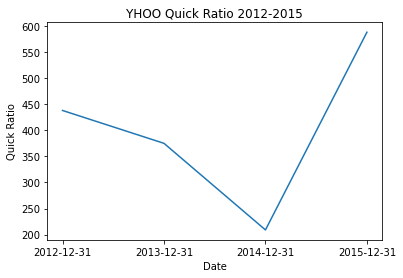

In [59]:
plt.plot(x_axis,y_axis)
plt.title("YHOO Quick Ratio 2012-2015")
plt.xlabel('Date')
plt.ylabel('Quick Ratio')
plt.savefig("../visuals/YHOO_quickratio.png")
plt.show()

## Quick ratio plot for AKAM

In [62]:
akam_quick_ratio = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'AKAM' , 
            ['Period Ending','Quick Ratio']
]
akam_quick_ratio

,Period Ending,Quick Ratio
72,2012-12-31,359.0
73,2013-12-31,391.0
74,2014-12-31,378.0
75,2015-12-31,377.0


In [63]:
x_axis = akam_quick_ratio['Period Ending']
y_axis = akam_quick_ratio['Quick Ratio']

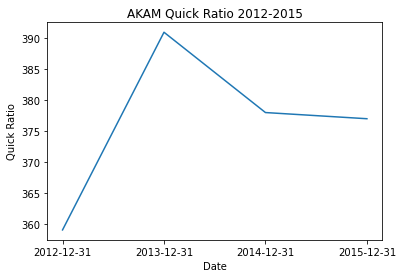

In [64]:
plt.plot(x_axis,y_axis)
plt.title("AKAM Quick Ratio 2012-2015")
plt.xlabel('Date')
plt.ylabel('Quick Ratio')
plt.savefig("../visuals/AKAM_quickratio.png")
plt.show()

## Quick ratio plot for FTR

In [72]:
ftr_quick_ratio = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'FTR' , 
            ['Period Ending','Quick Ratio']
]
ftr_quick_ratio

,Period Ending,Quick Ratio
676,2012-12-31,134.0
677,2013-12-31,124.0
678,2014-12-31,94.0
679,2015-12-31,535.0


In [73]:
x_axis = ftr_quick_ratio['Period Ending']
y_axis = ftr_quick_ratio['Quick Ratio']

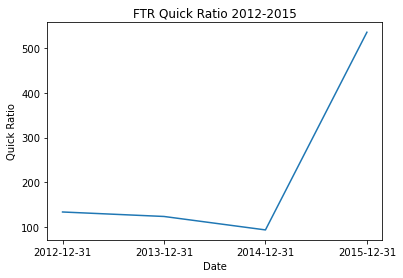

In [74]:
plt.plot(x_axis,y_axis)
plt.title("FTR Quick Ratio 2012-2015")
plt.xlabel('Date')
plt.ylabel('Quick Ratio')
plt.savefig("../visuals/FTR_quickratio.png")
plt.show()

## Quick ratio plot for APA

In [66]:
apa_quick_ratio = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'APA' , 
            ['Period Ending','Quick Ratio']
]
apa_quick_ratio

,Period Ending,Quick Ratio
136,2012-12-31,73.0
137,2013-12-31,116.0
138,2014-12-31,156.0
139,2015-12-31,173.0


In [67]:
x_axis = apa_quick_ratio['Period Ending']
y_axis = apa_quick_ratio['Quick Ratio']

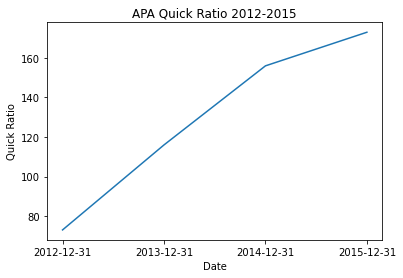

In [68]:
plt.plot(x_axis,y_axis)
plt.title("APA Quick Ratio 2012-2015")
plt.xlabel('Date')
plt.ylabel('Quick Ratio')
plt.savefig("../visuals/APA_quickratio.png")
plt.show()

## Quick ratio plot for XEC

In [69]:
xec_quick_ratio = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'XEC' , 
            ['Period Ending','Quick Ratio']
]
xec_quick_ratio

,Period Ending,Quick Ratio
1729,2012-12-31,60.0
1730,2013-12-31,59.0
1731,2014-12-31,108.0
1732,2015-12-31,250.0


In [70]:
x_axis = xec_quick_ratio['Period Ending']
y_axis = xec_quick_ratio['Quick Ratio']

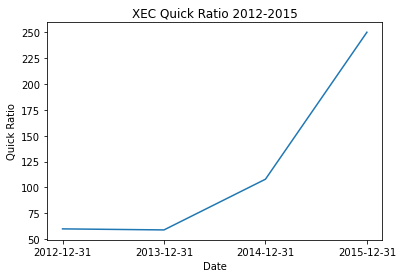

In [71]:
plt.plot(x_axis,y_axis)
plt.title("XEC Quick Ratio 2012-2015")
plt.xlabel('Date')
plt.ylabel('Quick Ratio')
plt.savefig("../visuals/XEC_quickratio.png")
plt.show()

## EPS
The higher the earnings per share of a company, the better is its profitability

## EPS plot for YHOO

In [54]:
yahoo_eps = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'YHOO' , 
            ['Period Ending','Earnings Per Share']
]
yahoo_eps

,Period Ending,Quick Ratio
1761,2012-12-31,438.0
1762,2013-12-31,375.0
1763,2014-12-31,209.0
1764,2015-12-31,588.0


In [56]:
x_axis = yahoo_eps['Period Ending']
y_axis = yahoo_eps['Earnings Per Share']

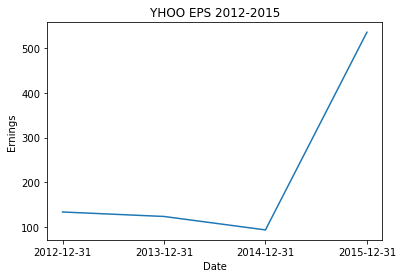

In [75]:
plt.plot(x_axis,y_axis)
plt.title("YHOO EPS 2012-2015")
plt.xlabel('Date')
plt.ylabel('Ernings')
plt.savefig("../visuals/YHOO_eps.png")
plt.show()

## EPS plot for APA

In [76]:
apa_eps = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'APA' , 
            ['Period Ending','Earnings Per Share']
]
apa_eps

,Period Ending,Earnings Per Share
136,2012-12-31,4.95
137,2013-12-31,5.53
138,2014-12-31,-14.06
139,2015-12-31,-61.20


In [77]:
x_axis = apa_eps['Period Ending']
y_axis = apa_eps['Earnings Per Share']

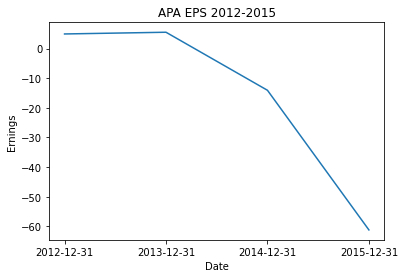

In [78]:
plt.plot(x_axis,y_axis)
plt.title("APA EPS 2012-2015")
plt.xlabel('Date')
plt.ylabel('Ernings')
plt.savefig("../visuals/APA_eps.png")
plt.show()

## EPS plot for FTR

In [79]:
ftr_eps = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'FTR' , 
            ['Period Ending','Earnings Per Share']
]
ftr_eps

,Period Ending,Earnings Per Share
676,2012-12-31,0.14
677,2013-12-31,0.11
678,2014-12-31,0.13
679,2015-12-31,-0.29


In [80]:
x_axis = ftr_eps['Period Ending']
y_axis = ftr_eps['Earnings Per Share']

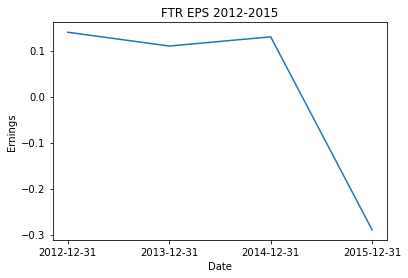

In [81]:
plt.plot(x_axis,y_axis)
plt.title("FTR EPS 2012-2015")
plt.xlabel('Date')
plt.ylabel('Ernings')
plt.savefig("../visuals/FTR_eps.png")
plt.show()

## EPS plot for XEC

In [82]:
xec_eps = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'XEC' , 
            ['Period Ending','Earnings Per Share']
]
xec_eps

,Period Ending,Earnings Per Share
1729,2012-12-31,4.08
1730,2013-12-31,6.48
1731,2014-12-31,5.79
1732,2015-12-31,-25.92


In [83]:
x_axis = xec_eps['Period Ending']
y_axis = xec_eps['Earnings Per Share']

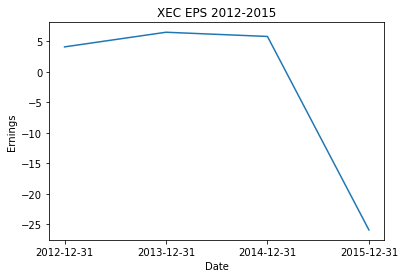

In [84]:
plt.plot(x_axis,y_axis)
plt.title("XEC EPS 2012-2015")
plt.xlabel('Date')
plt.ylabel('Ernings')
plt.savefig("../visuals/XEC_eps.png")
plt.show()

## EPS plot for AKAM

In [85]:
akam_eps = fundamentals.loc[
            fundamentals['Ticker Symbol'] == 'AKAM' , 
            ['Period Ending','Earnings Per Share']
]
akam_eps

,Period Ending,Earnings Per Share
72,2012-12-31,1.15
73,2013-12-31,1.65
74,2014-12-31,1.87
75,2015-12-31,1.80


In [86]:
x_axis = akam_eps['Period Ending']
y_axis = akam_eps['Earnings Per Share']

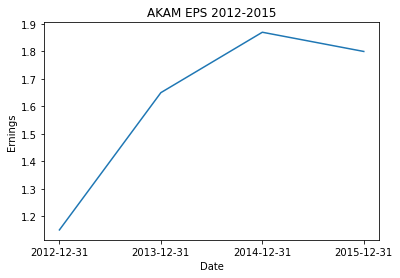

In [87]:
plt.plot(x_axis,y_axis)
plt.title("AKAM EPS 2012-2015")
plt.xlabel('Date')
plt.ylabel('Ernings')
plt.savefig("../visuals/AKAM_eps.png")
plt.show()

# Crrelation between stocks 

A correlation coefficient of 1 indicates a perfect positive correlation between the prices of two stocks, meaning the stocks always move the same direction by the same amount. A coefficient of -1 indicates a perfect negative correlation, meaning that the stocks have historically always moved in the opposite direction.

Correlation is used in modern portfolio theory to include diversified assets that can help reduce the overall risk of a portfolio. One of the main criticisms of MPT, however, is that it assumes the correlation between assets is static over time. In reality, correlations often shift, especially during periods of higher volatility. In short, while correlation has some predictive value, the measure has limitations in its use.